In [1]:
import warnings
warnings.filterwarnings("ignore")

## Importing Libraries

### Data Processing and Visualization

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Machine Learning Libraries

#### Data Splitting

In [2]:
from sklearn.model_selection import train_test_split

#### Data Pre-processing

In [3]:
from sklearn.preprocessing import LabelEncoder

#### ML Algorithms

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#### Metrics

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Loading Train and Test Data

In [8]:
train_data = pd.read_csv('data/Training Data.csv')
test_data = pd.read_csv('data/Test Data.csv')

In [9]:
train_data

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [10]:
test_data

,ID,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11
...,...,...,...,...,...,...,...,...,...,...,...,...
27995,27996,9955481,57,13,single,rented,no,Statistician,Eluru[25],Andhra Pradesh,5,10
27996,27997,2917765,47,9,single,rented,no,Technical writer,Ratlam,Madhya Pradesh,9,14
27997,27998,8082415,24,5,single,rented,no,Lawyer,Mira-Bhayandar,Maharashtra,4,13
27998,27999,9474180,51,13,single,rented,yes,Chartered Accountant,Bhilai,Chhattisgarh,13,14


## Exploratory Data Analysis

### Checking Data Type

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


We conclude that the dataset has no null values

### Data Visualization

In [12]:
def plot_hist(data1, data2, feature, labels):
    plt.hist([data1[feature], data2[feature]], bins=10, label=labels, density=True, stacked=True)
    plt.title("Defaults based on {}".format(feature))
    plt.legend()
    plt.xlabel(feature)
    plt.show()
    
def plot_pie(data, labels, title, axis=None, ax_index=None):
    if axis is not None and ax_index is not None:
        axis[ax_index % 13, ax_index // 13].pie(data, labels=labels, autopct='%1.1f%%')
        axis[ax_index % 13, ax_index // 13].set_title("Defaults based on {}".format(title))
    else:
        plt.pie(data, labels=labels, autopct='%1.1f%%')
        plt.title("Defaults based on {}".format(title))
        plt.show()

In [13]:
def get_defaults(data, feature, value, text=None):
    all_value = data[data[feature] == value]['Risk_Flag'].value_counts()
    print("Proportion of {} who default: {}".format(text or value, all_value[1]/(all_value[0] + all_value[1])))
    return all_value

In [14]:
risky_1 = train_data[train_data['Risk_Flag'] == 1]
risky_0 = train_data[train_data['Risk_Flag'] == 0]

In [15]:
flags = ['Risky', 'Safe']

#### Influence on Income on Risk factor

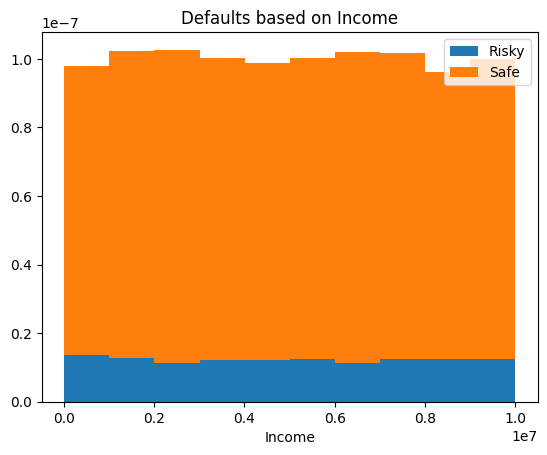

In [16]:
plot_hist(risky_1, risky_0, 'Income', flags)

#### Influence of Age on Risk Factor

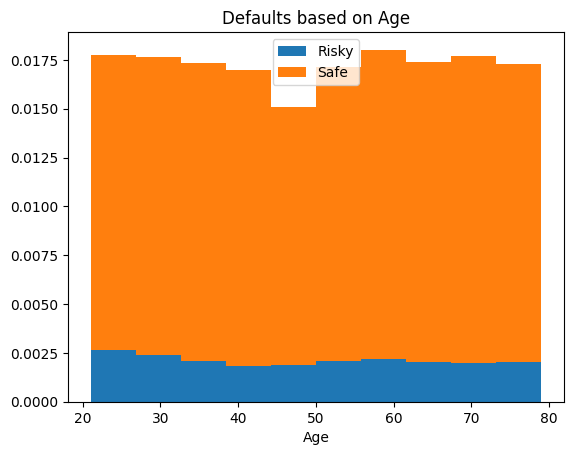

In [17]:
plot_hist(risky_1, risky_0, 'Age', flags)

#### Influence of Experience on Risk Factor

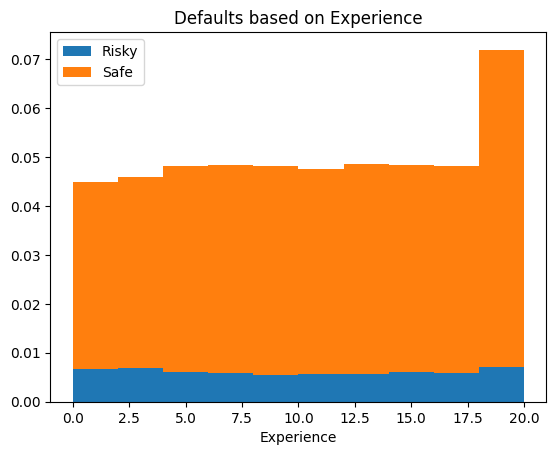

In [18]:
plot_hist(risky_1, risky_0, 'Experience', flags)

#### Influence of Job Years on Risk Factor

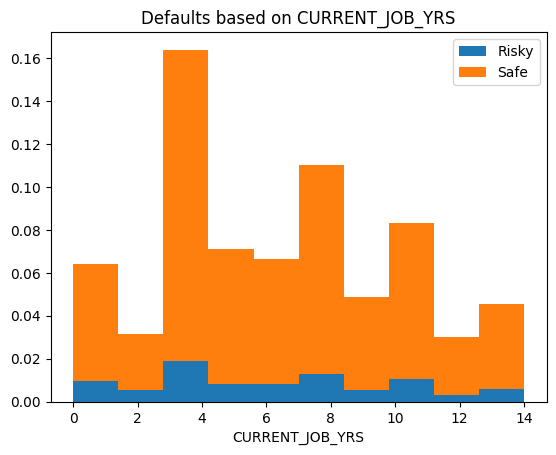

In [19]:
plot_hist(risky_1, risky_0, 'CURRENT_JOB_YRS', flags)

#### Influence of House Years on Risk Factor

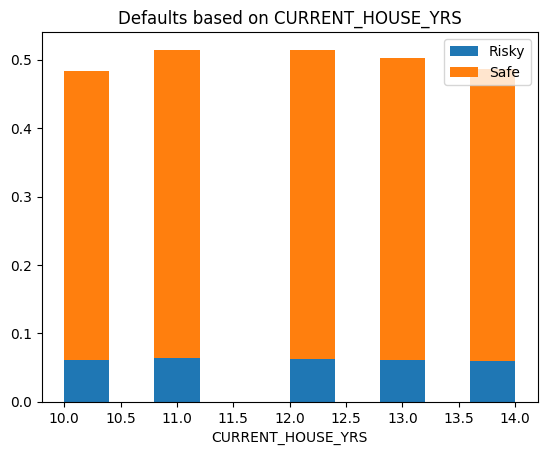

In [20]:
plot_hist(risky_1, risky_0, 'CURRENT_HOUSE_YRS', flags)

#### Influence of Gender on Risk Factor

In [21]:
train_data['Married/Single'].value_counts()

single     226272
married     25728
Name: Married/Single, dtype: int64

In [22]:
all_singles = get_defaults(train_data, 'Married/Single', 'single')

Proportion of single who default: 0.1253358789421581


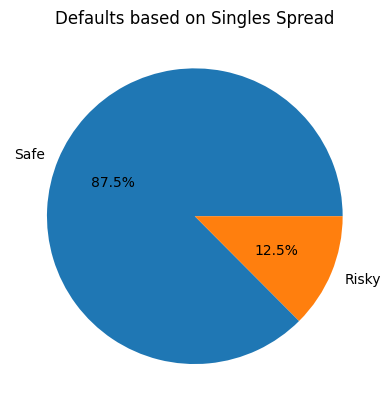

In [23]:
plot_pie(all_singles, flags[::-1], 'Singles Spread')

In [24]:
all_married = get_defaults(train_data, 'Married/Single', 'married')

Proportion of married who default: 0.10245646766169154


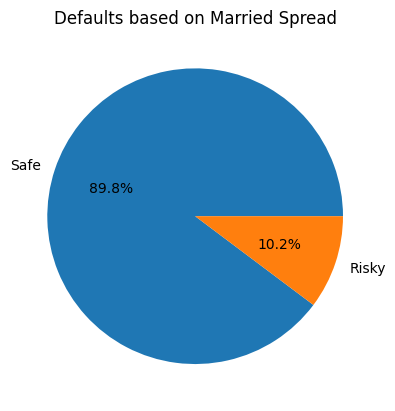

In [25]:
plot_pie(all_married, flags[::-1], 'Married Spread')

#### Influence of House Ownership on Risk Factor

In [26]:
train_data['House_Ownership'].value_counts()

rented          231898
owned            12918
norent_noown      7184
Name: House_Ownership, dtype: int64

In [27]:
all_rented = get_defaults(train_data, 'House_Ownership', 'rented')

Proportion of rented who default: 0.1255767621971729


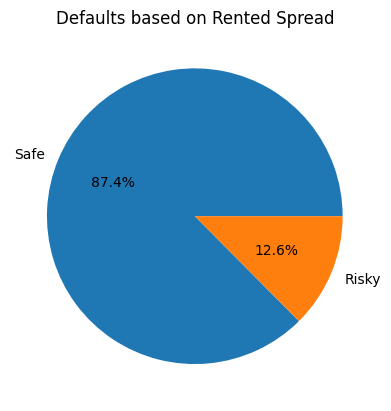

In [28]:
plot_pie(all_rented, flags[::-1], 'Rented Spread')

In [29]:
all_owned = get_defaults(train_data, 'House_Ownership', 'owned')

Proportion of owned who default: 0.08979718222635083


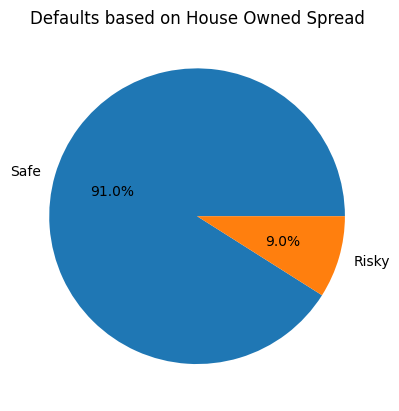

In [30]:
plot_pie(all_owned, flags[::-1], 'House Owned Spread')

In [31]:
all_noown = get_defaults(train_data, 'House_Ownership', 'norent_noown')

Proportion of norent_noown who default: 0.09952672605790645


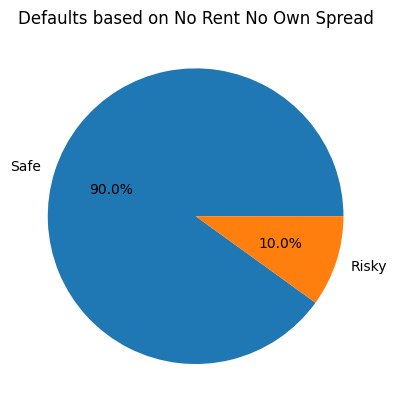

In [32]:
plot_pie(all_noown, flags[::-1], 'No Rent No Own Spread')

#### Influence of Car Ownership on Risk Factor

In [33]:
all_car = get_defaults(train_data, 'Car_Ownership', 'yes', 'Car Owners')

Proportion of Car Owners who default: 0.11098684210526316


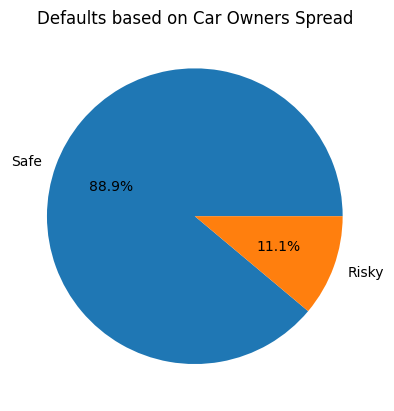

In [34]:
plot_pie(all_car, flags[::-1], 'Car Owners Spread')

In [35]:
no_car = get_defaults(train_data, 'Car_Ownership', 'no', 'Non Car Owners')

Proportion of Non Car Owners who default: 0.1281875


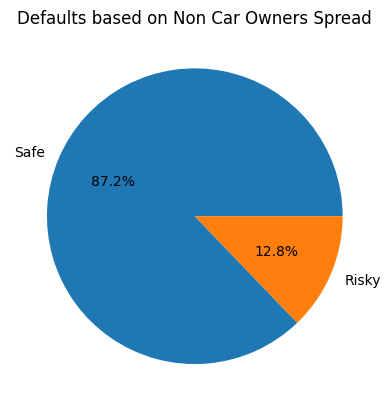

In [36]:
plot_pie(no_car, flags[::-1], 'Non Car Owners Spread')

#### Influence of Profession on Risk Factor

In [37]:
train_data['Profession'].value_counts()

Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer            5053
Petroleum_Engineer            5041
Police_officer                5035
Computer_operator             4990
Politician                    4944
Microbiologist                4881
Technician                    4864
Artist                        4861
Lawyer              

Proportion of Physician who default: 0.11918751049185831
Proportion of Statistician who default: 0.11557009989665863
Proportion of Web_designer who default: 0.10913470446544377
Proportion of Psychologist who default: 0.12189239332096476
Proportion of Computer_hardware_engineer who default: 0.12844378257632166
Proportion of Drafter who default: 0.1128941966784848
Proportion of Magistrate who default: 0.12002986746313235
Proportion of Fashion_Designer who default: 0.11538461538461539
Proportion of Air_traffic_controller who default: 0.1353910244271918
Proportion of Comedian who default: 0.11960448754516068
Proportion of Industrial_Engineer who default: 0.09866666666666667
Proportion of Mechanical_engineer who default: 0.11155836687751582
Proportion of Chemical_engineer who default: 0.11162343900096061
Proportion of Technical_writer who default: 0.134167468719923
Proportion of Hotel_Manager who default: 0.13538045577443028
Proportion of Financial_Analyst who default: 0.10315463518482679
P

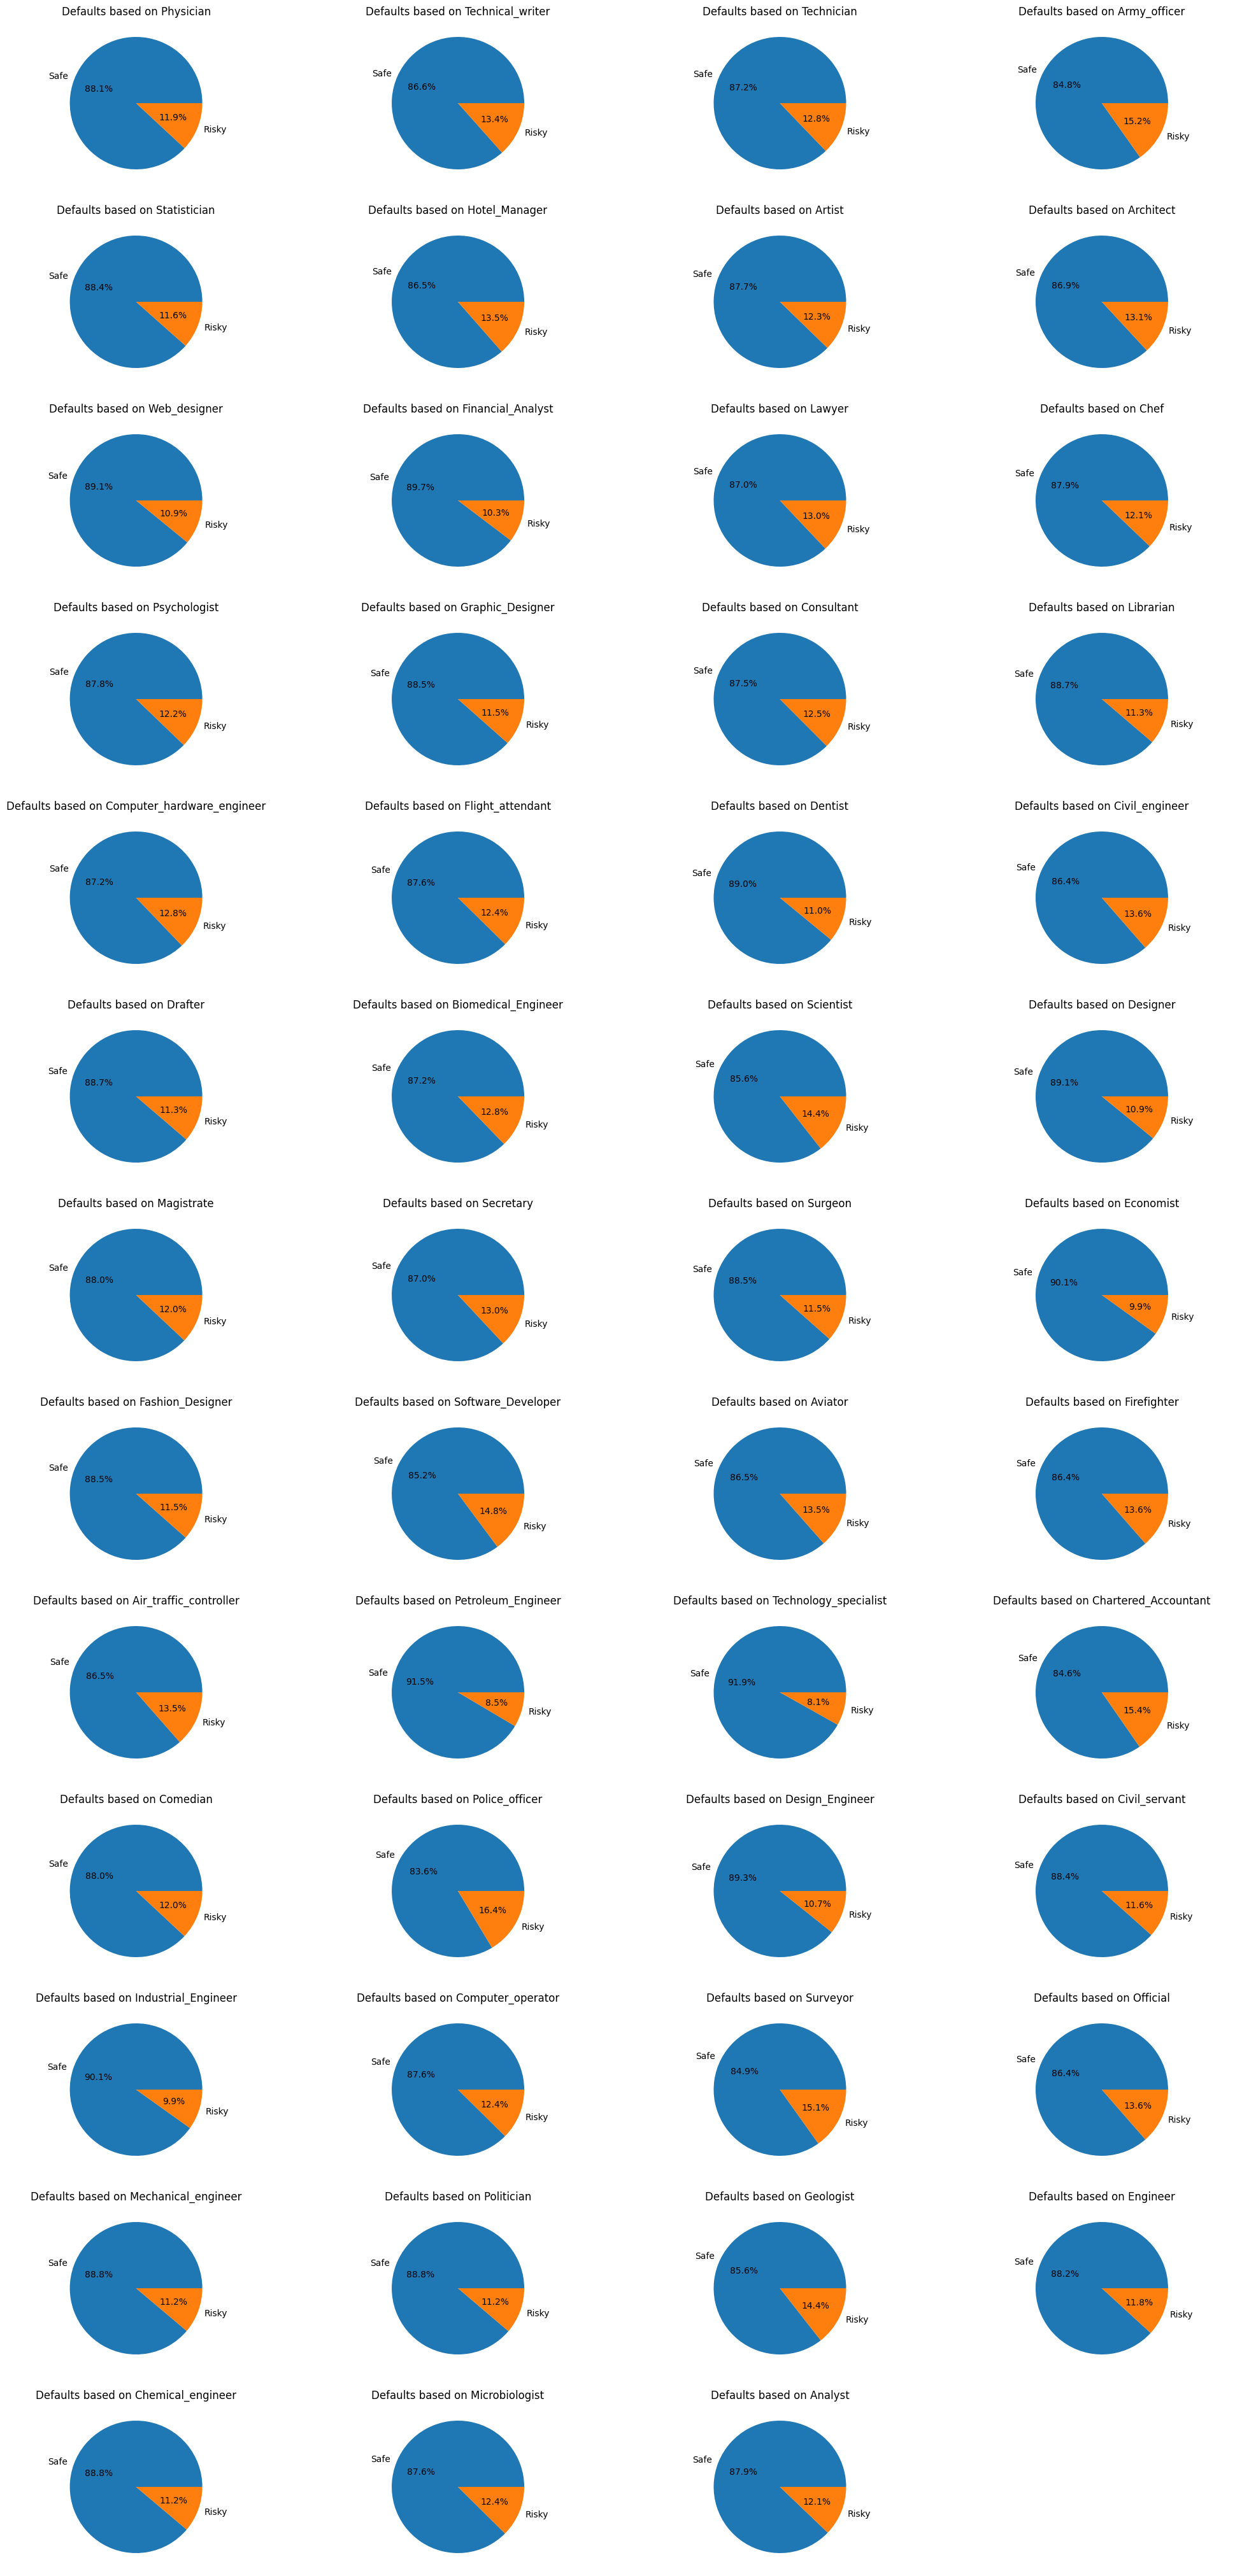

In [38]:
professions = list(train_data['Profession'].value_counts().index)
fig, ax = plt.subplots(13, 4, figsize=(25, 52))
ax_index = 0
for profession in professions:
    all_data = get_defaults(train_data, 'Profession', profession)
    plot_pie(all_data, flags[::-1], str(profession), ax, ax_index)
    ax_index += 1
_ = ax[-1, -1].axis('off')

#### Influence of State on Risk Factor

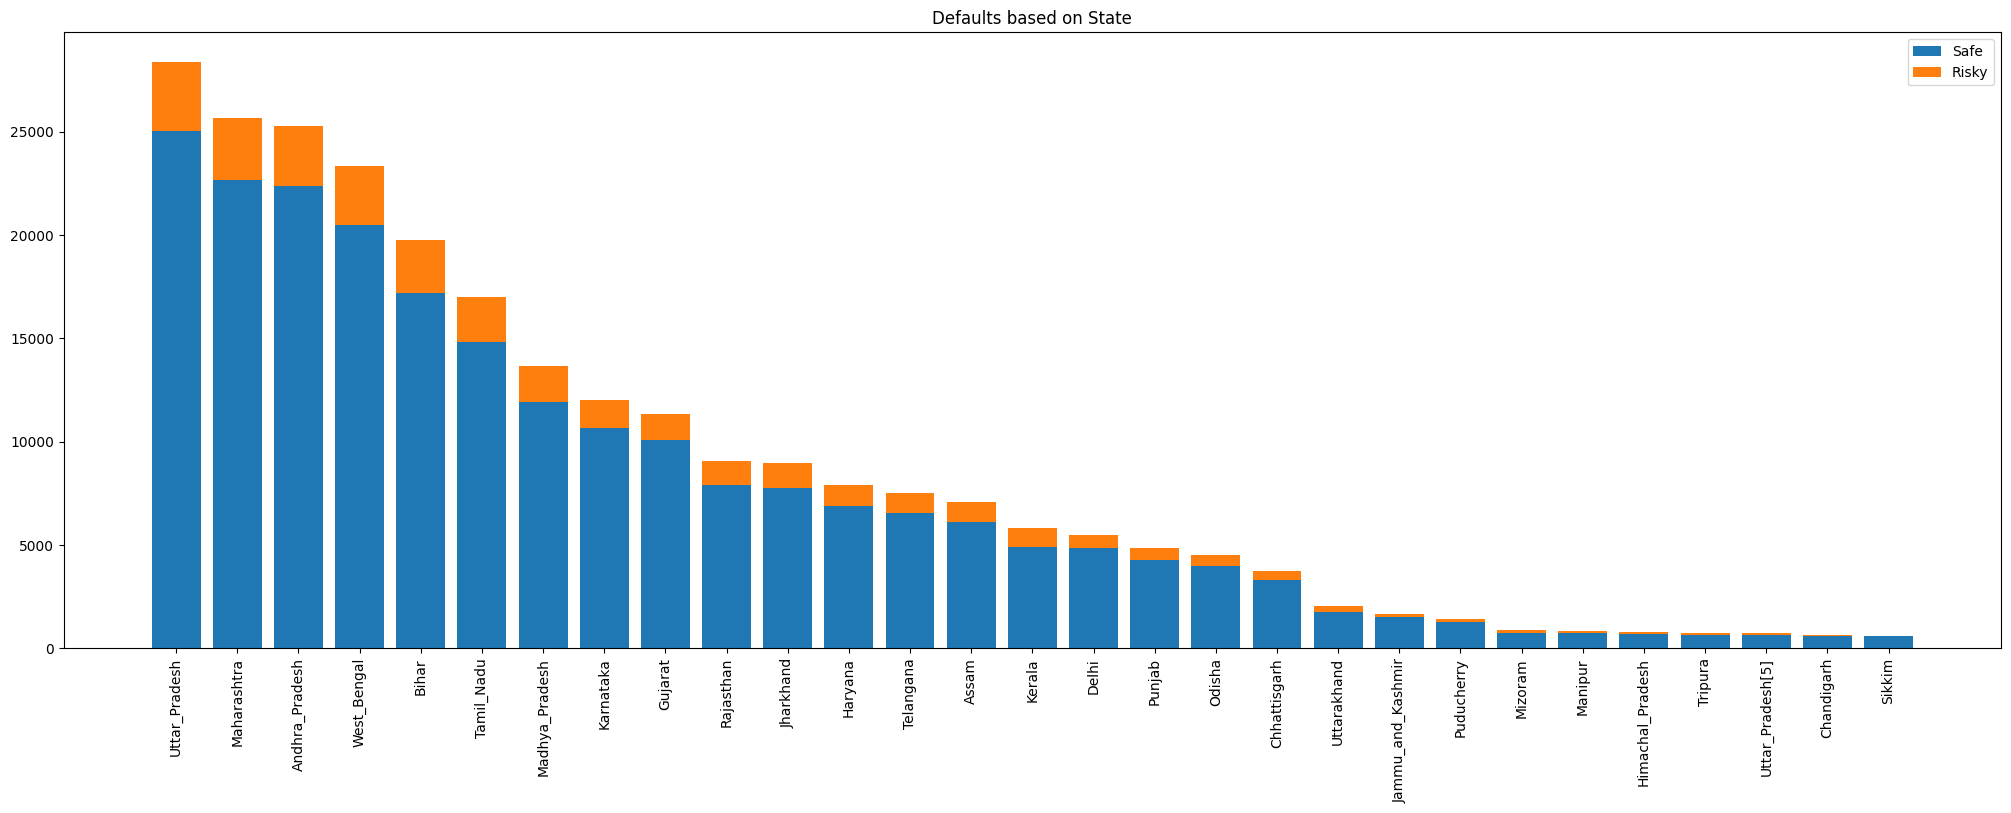

In [39]:
states = list(train_data['STATE'].value_counts().index)
fig, ax = plt.subplots(figsize=(25, 8))
ax.bar(states, risky_0['STATE'].value_counts())
ax.bar(states, risky_1['STATE'].value_counts(), bottom=risky_0['STATE'].value_counts())
plt.title("Defaults based on State")
plt.xticks(rotation=90)
_ = plt.legend(flags[::-1])

## Data Preprocessing

### Remove unwanted columns

In [40]:
train_data.drop('Id', axis=1, inplace=True)

### Encoding Categorical Columns

In [41]:
categorical_cols = [col for col in train_data.columns if train_data[col].dtype=="O"]

label_encoder = LabelEncoder()

for col in categorical_cols:
    train_data[col] = label_encoder.fit_transform(train_data[col])

In [42]:
train_data

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,1,2,0,33,251,13,3,13,0
1,7574516,40,10,1,2,0,43,227,14,9,13,0
2,3991815,66,4,0,2,0,47,8,12,4,10,0
3,6256451,41,2,1,2,1,43,54,17,2,12,1
4,5768871,47,11,1,2,0,11,296,22,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,1,2,0,45,162,28,6,11,0
251996,2843572,26,10,1,2,0,3,251,13,6,11,0
251997,4522448,46,7,1,2,0,17,144,14,7,12,0
251998,6507128,45,0,1,2,0,27,233,18,0,10,0


### Splitting Dataset into Training and Validation Set

In [66]:
X_train, X_val, y_train, y_val = train_test_split(train_data.drop('Risk_Flag', axis=1), train_data['Risk_Flag'], test_size=0.3, random_state=101, stratify=train_data['Risk_Flag'])

### Scaling Data Values in Training Set

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

## Training Model

In [68]:
import pickle

def model_apply(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    print("Accuracy: {}".format(accuracy_score(y_val, y_pred)))
    
    print("Classification Report: \n{}".format(classification_report(y_val, y_pred)))
    
    conf_matrix = confusion_matrix(y_val, y_pred)
    print("Confusion Matrix: ")
    sns.heatmap(conf_matrix, annot=True, fmt='d')
    
    filename = "model/{}.pkl".format(model.__class__.__name__)
    pickle.dump(model, open(filename, 'wb'))

In [78]:
logistic_regression = LogisticRegression(class_weight='balanced', penalty="l1", solver="liblinear")
decision_tree = DecisionTreeClassifier(class_weight='balanced', criterion='entropy', random_state=101)
random_forest = RandomForestClassifier(class_weight='balanced', random_state=101, n_estimators=100, criterion='entropy')
neighbours = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

### Logistic Regression

Accuracy: 0.507962962962963
Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.50      0.64     66301
           1       0.14      0.57      0.22      9299

    accuracy                           0.51     75600
   macro avg       0.51      0.53      0.43     75600
weighted avg       0.80      0.51      0.59     75600

Confusion Matrix: 


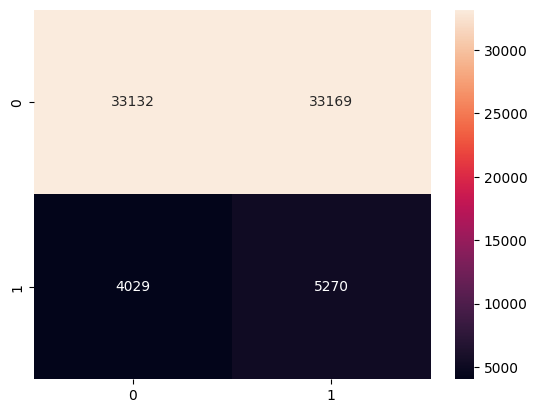

In [71]:
model_apply(logistic_regression)

Accuracy: 0.8781613756613756
Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.89      0.93     66301
           1       0.50      0.81      0.62      9299

    accuracy                           0.88     75600
   macro avg       0.74      0.85      0.77     75600
weighted avg       0.91      0.88      0.89     75600

Confusion Matrix: 


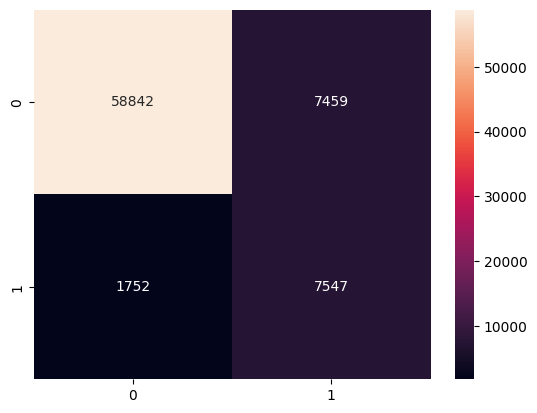

In [79]:
model_apply(decision_tree)

Accuracy: 0.8960185185185185
Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     66301
           1       0.56      0.77      0.64      9299

    accuracy                           0.90     75600
   macro avg       0.76      0.84      0.79     75600
weighted avg       0.92      0.90      0.90     75600

Confusion Matrix: 


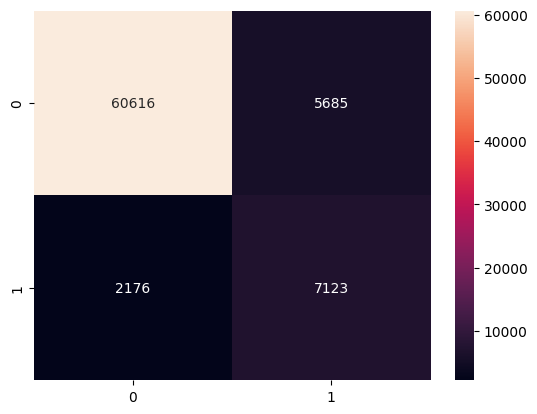

In [80]:
model_apply(random_forest)

Accuracy: 0.8882142857142857
Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     66301
           1       0.55      0.48      0.52      9299

    accuracy                           0.89     75600
   macro avg       0.74      0.71      0.73     75600
weighted avg       0.88      0.89      0.89     75600

Confusion Matrix: 


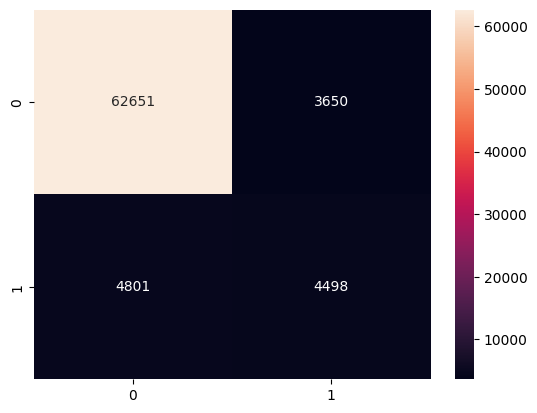

In [74]:
model_apply(neighbours)